#

In [ ]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

In [ ]:
df1 <- df %>%
  distinct()

In [ ]:
df1 <-  df1 |>
  mutate(pm2_swap=PM10, pm10_swap=PM2, ratio = pm2_swap/pm10_swap)

glimpse(df1)

Rows: 366,088
Columns: 17
$ Year         <int> 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 200…
$ Month        <int> 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, …
$ Day          <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ Hour         <int> 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, …
$ PM2          <dbl> 0.009, 0.006, 0.006, 0.005, 0.007, 0.007, 0.005, 0.007, 0…
$ PM10         <dbl> 0.007, 0.004, 0.003, 0.002, 0.004, 0.003, 0.002, 0.003, 0…
$ Visibility   <int> 20000, 20000, 20000, 20000, 20000, 20000, 20000, 17965, 9…
$ WD           <int> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N…
$ WS           <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N…
$ WS.u         <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N…
$ WS.v         <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N…
$ OPC          <int> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N…
$ Station.name

(`stat_bin()`).

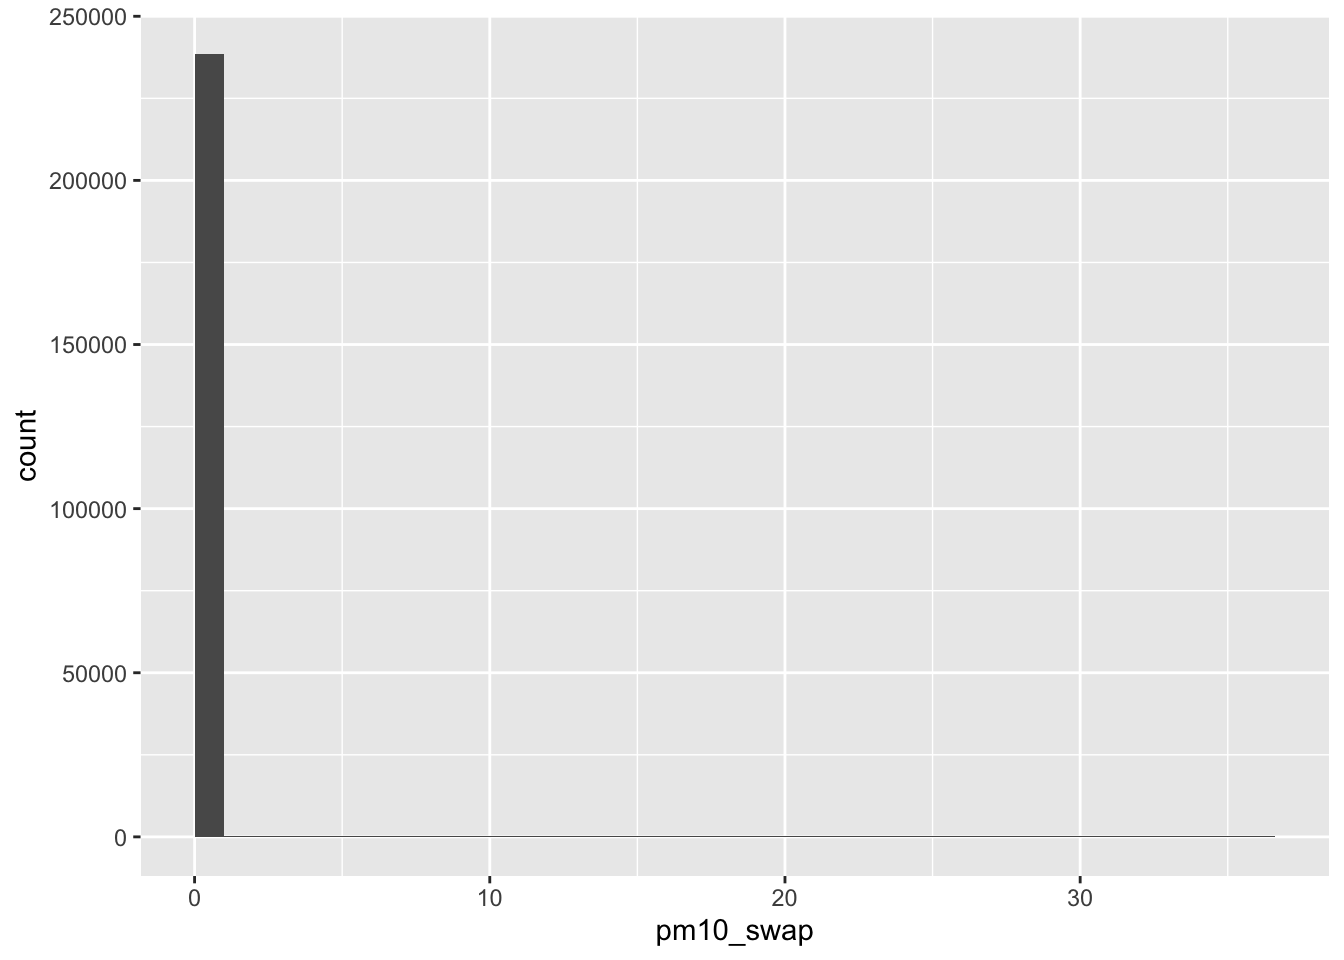

(`stat_bin()`).

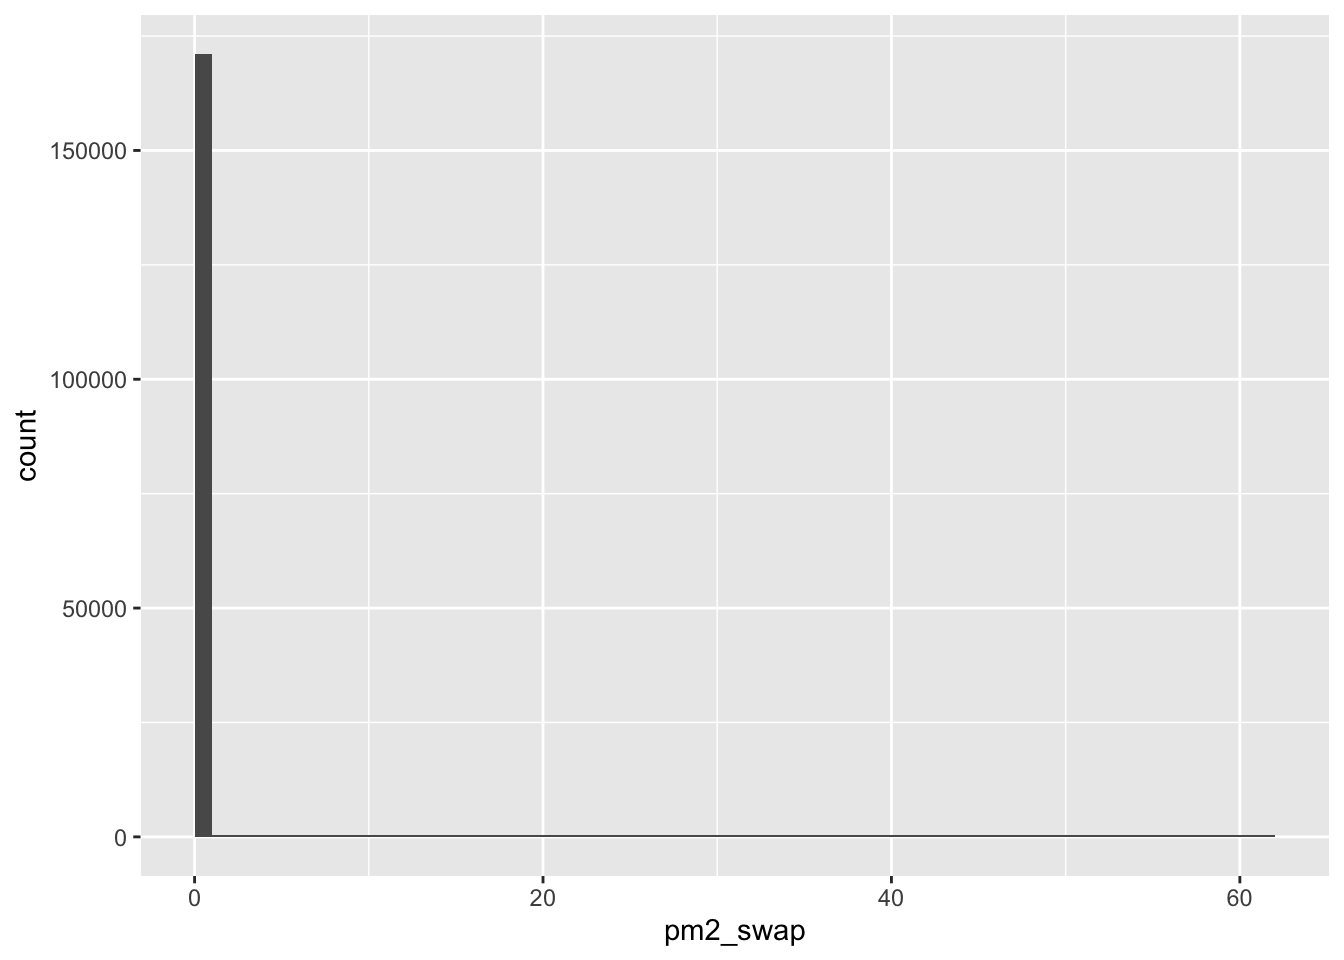

In [ ]:
breaks_pm10 <- c(min(df1$pm10_swap, na.rm = T), 0.001, 1, max(df1$pm10_swap, na.rm = T))
ggplot(df1, aes(pm10_swap)) + 
  geom_histogram(breaks=breaks_pm10)

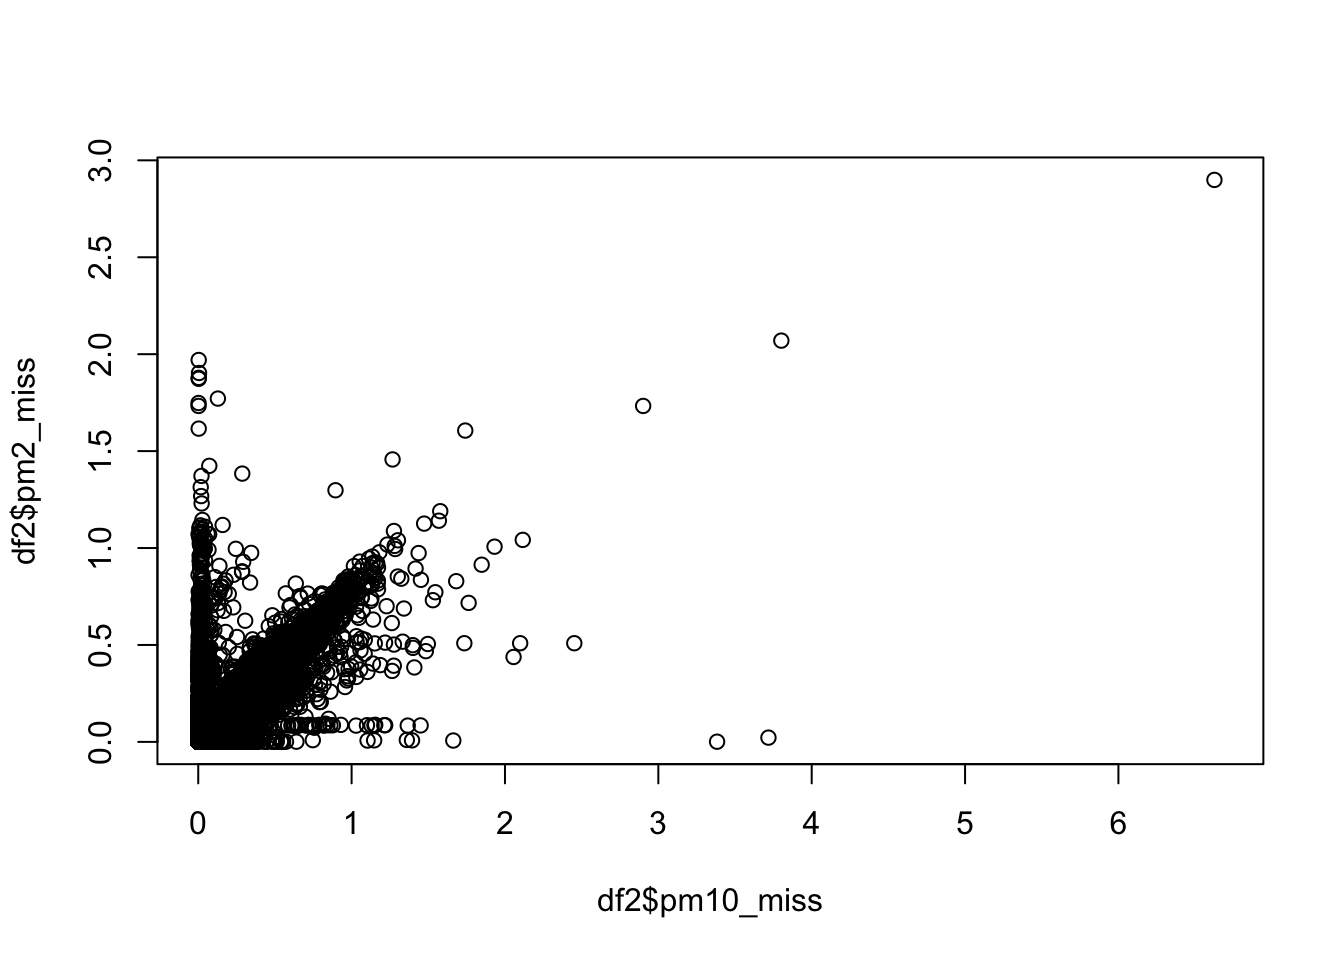

In [ ]:
df2 <- df1 |>
  mutate(pm10_miss = replace(pm10_swap, pm10_swap > 7 | pm10_swap == 0 , NA), 
         pm2_miss = replace(pm2_swap, pm2_swap > 7 | pm2_swap == 0, NA))
write_csv(df2, file = "/Users/munkhtsetseg/WORK/Research/Data/02_data_tidy/clean_df2.csv")

plot(df2$pm10_miss, df2$pm2_miss)

    [1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [37] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [49] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [61] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [73] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [85] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [97] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [109] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [121] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [133] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [145] FALSE FALSE FALSE FALSE FALSE FA

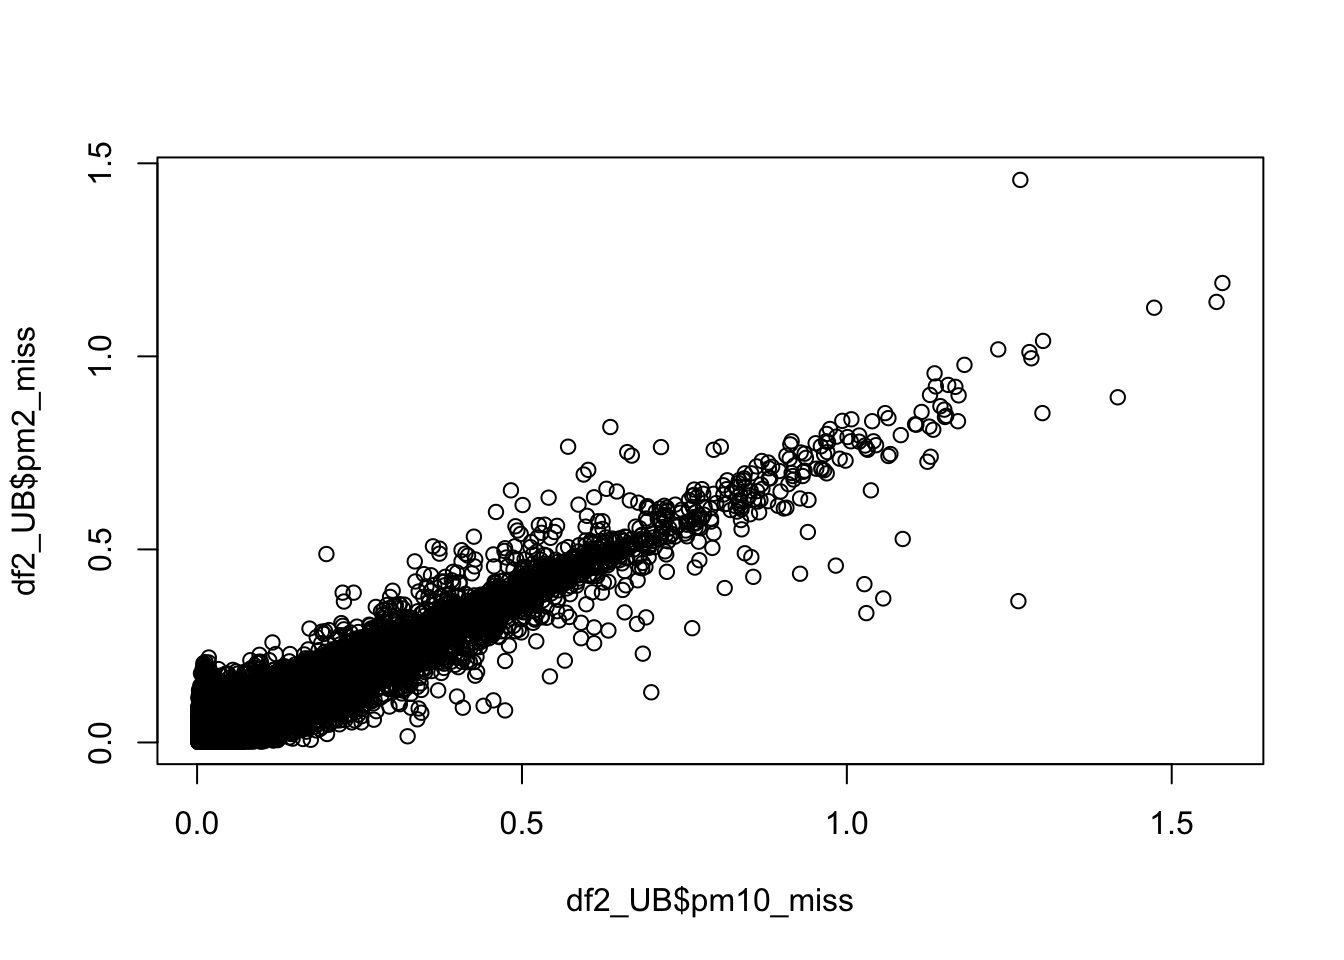

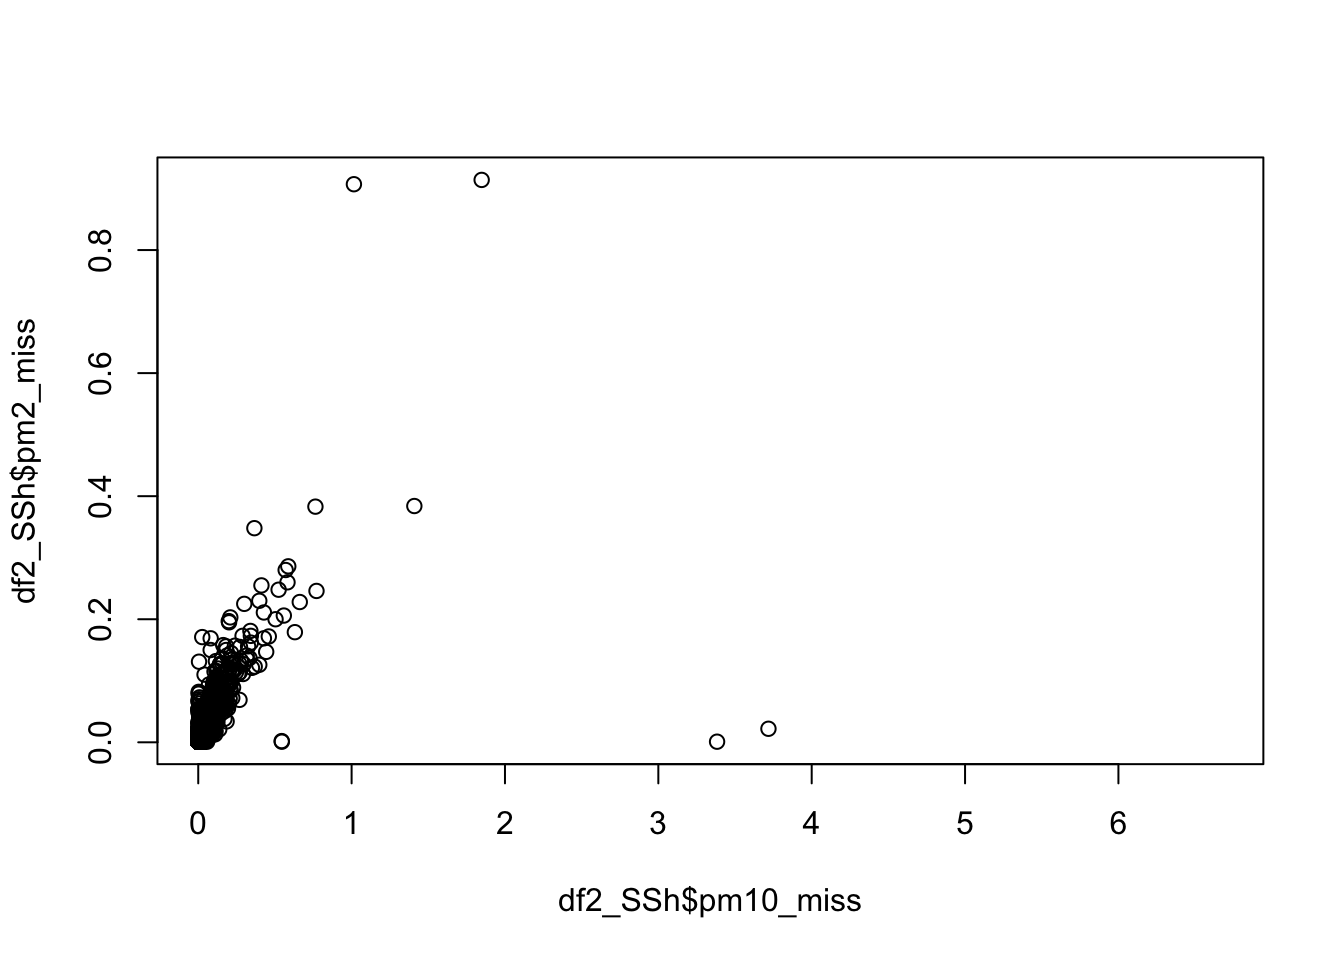

In [ ]:
df2$Date < as.Date(df2$Date)

(`geom_point()`).

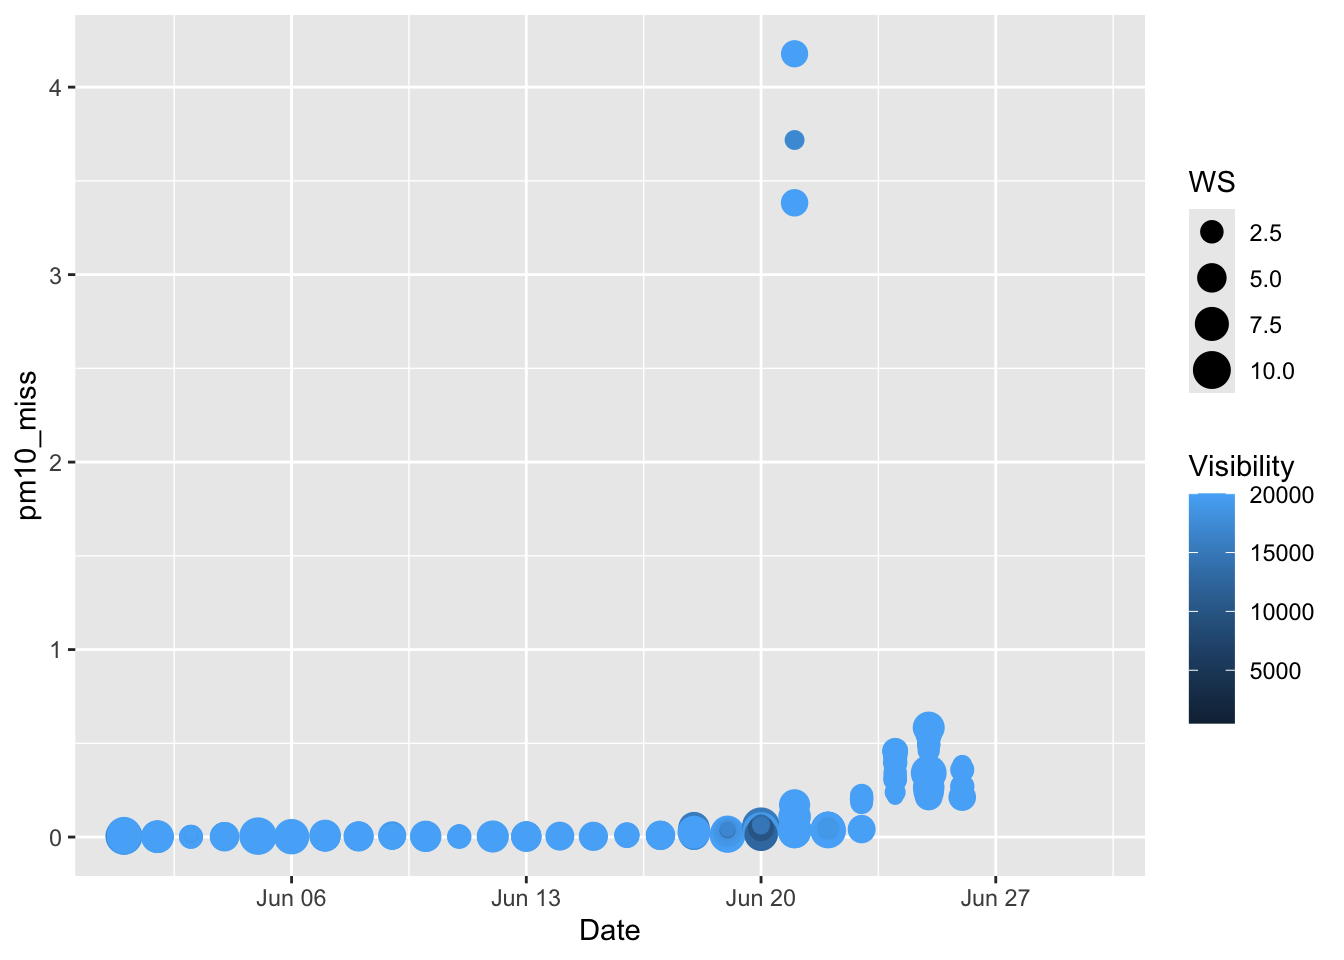

In [ ]:
df2 |>
  filter(Station.name == "Sainshand" & Year ==2011 & Month ==6) |>
  ggplot(aes(Date, pm10_miss, size = WS, color=Visibility)) +
  geom_point()

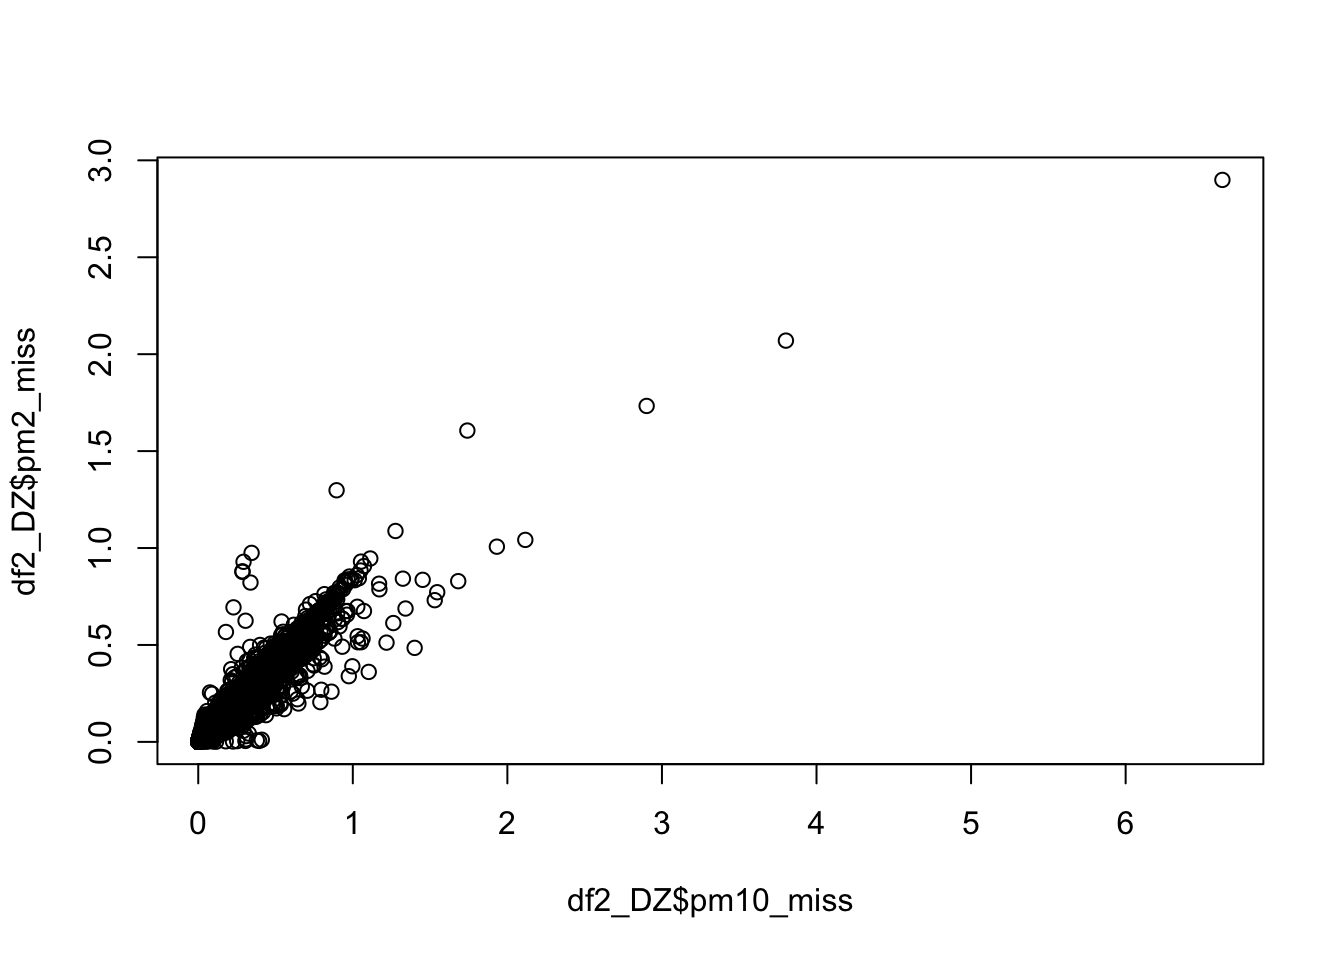

(`geom_point()`).

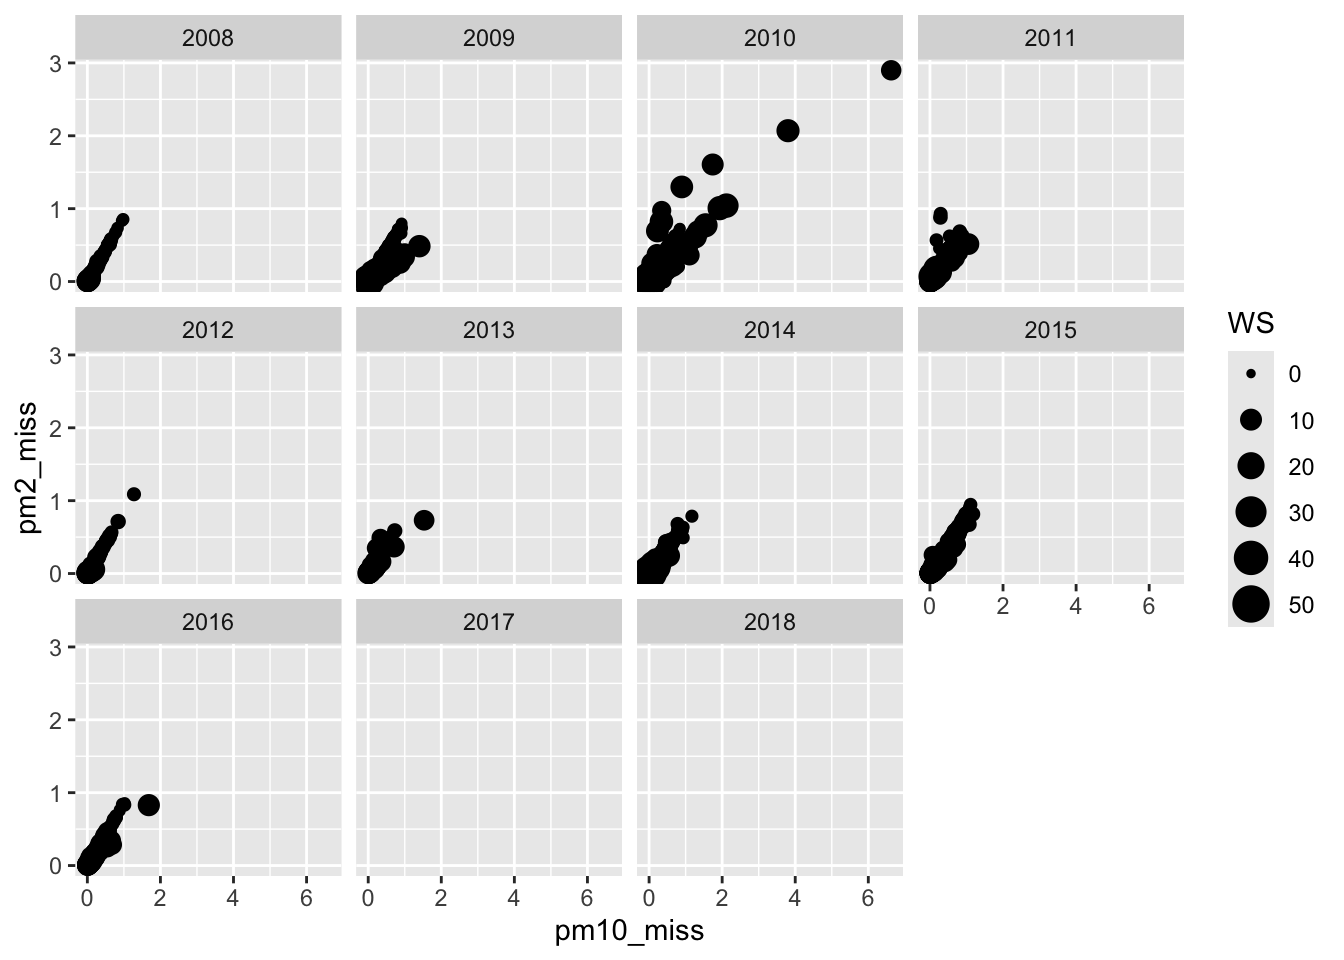

In [ ]:
df2_DZ <- df2 |>
  filter(Station.name == "Dalanzadgad") |>
  mutate(pm2_miss = replace(pm2_swap, pm2_swap > pm10_swap*3.5 | pm2_swap == 0, NA))
write_csv(df2_DZ, file = "/Users/munkhtsetseg/WORK/Research/Data/02_data_tidy/clean_df2_DZ.csv")
plot(df2_DZ$pm10_miss, df2_DZ$pm2_miss)

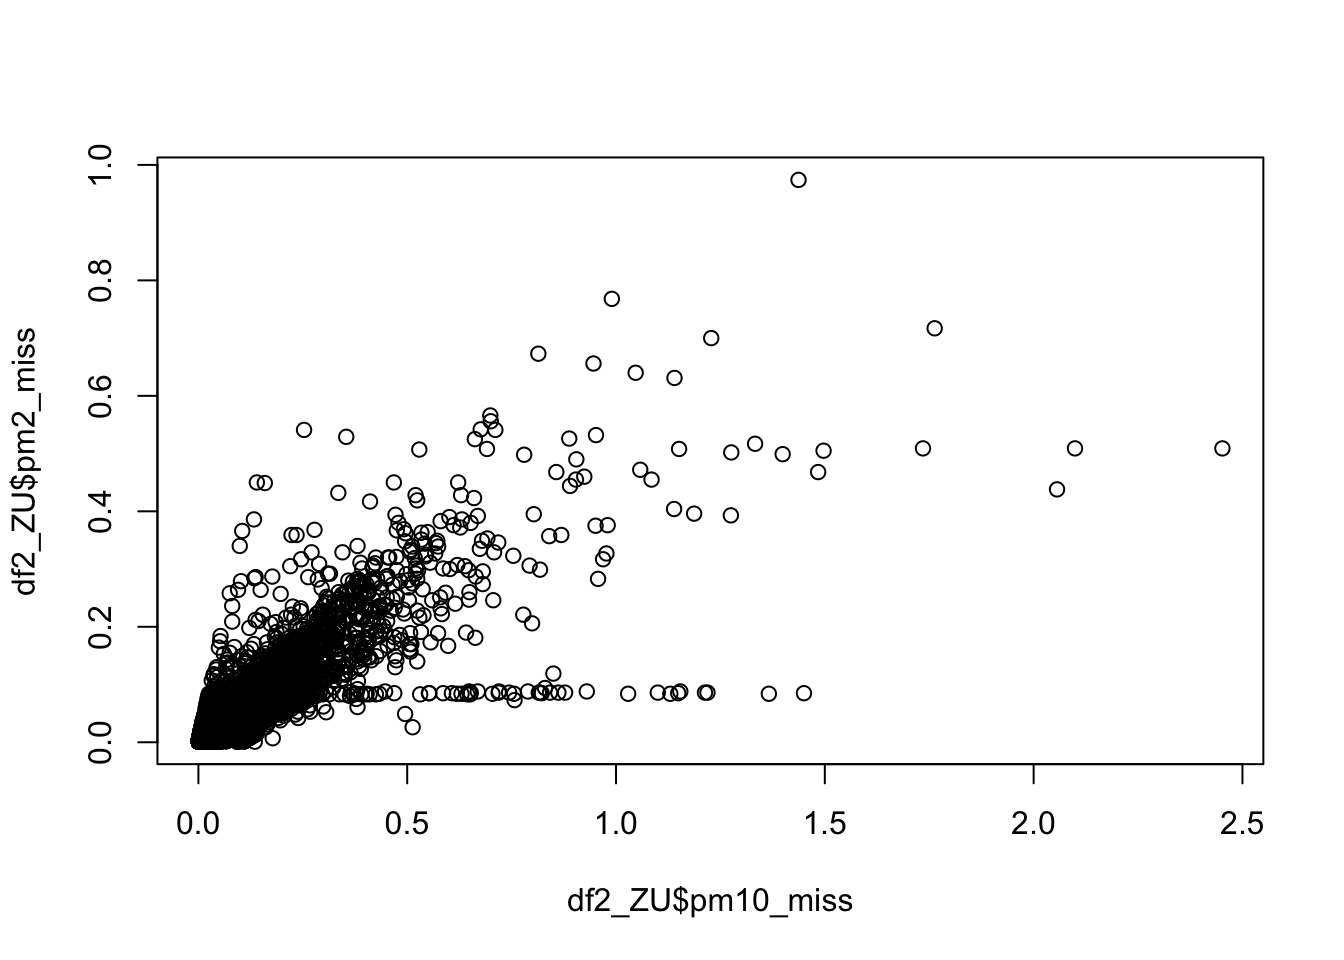

In [ ]:
df2_ZU <- df2 |>
filter(Station.name == "Zamynuud" ) |>
  mutate(pm2_miss = replace(pm2_swap, pm2_swap > pm10_swap*3.5 | pm2_swap == 0, NA),
         pm10_miss = replace(pm10_swap, Year > 2016 & pm10_swap > 0.5 | Year > 2017, NA))
write_csv(df2_ZU, file = "/Users/munkhtsetseg/WORK/Research/Data/02_data_tidy/clean_df2_ZU.csv")
plot(df2_ZU$pm10_miss, df2_ZU$pm2_miss)

(`geom_point()`).

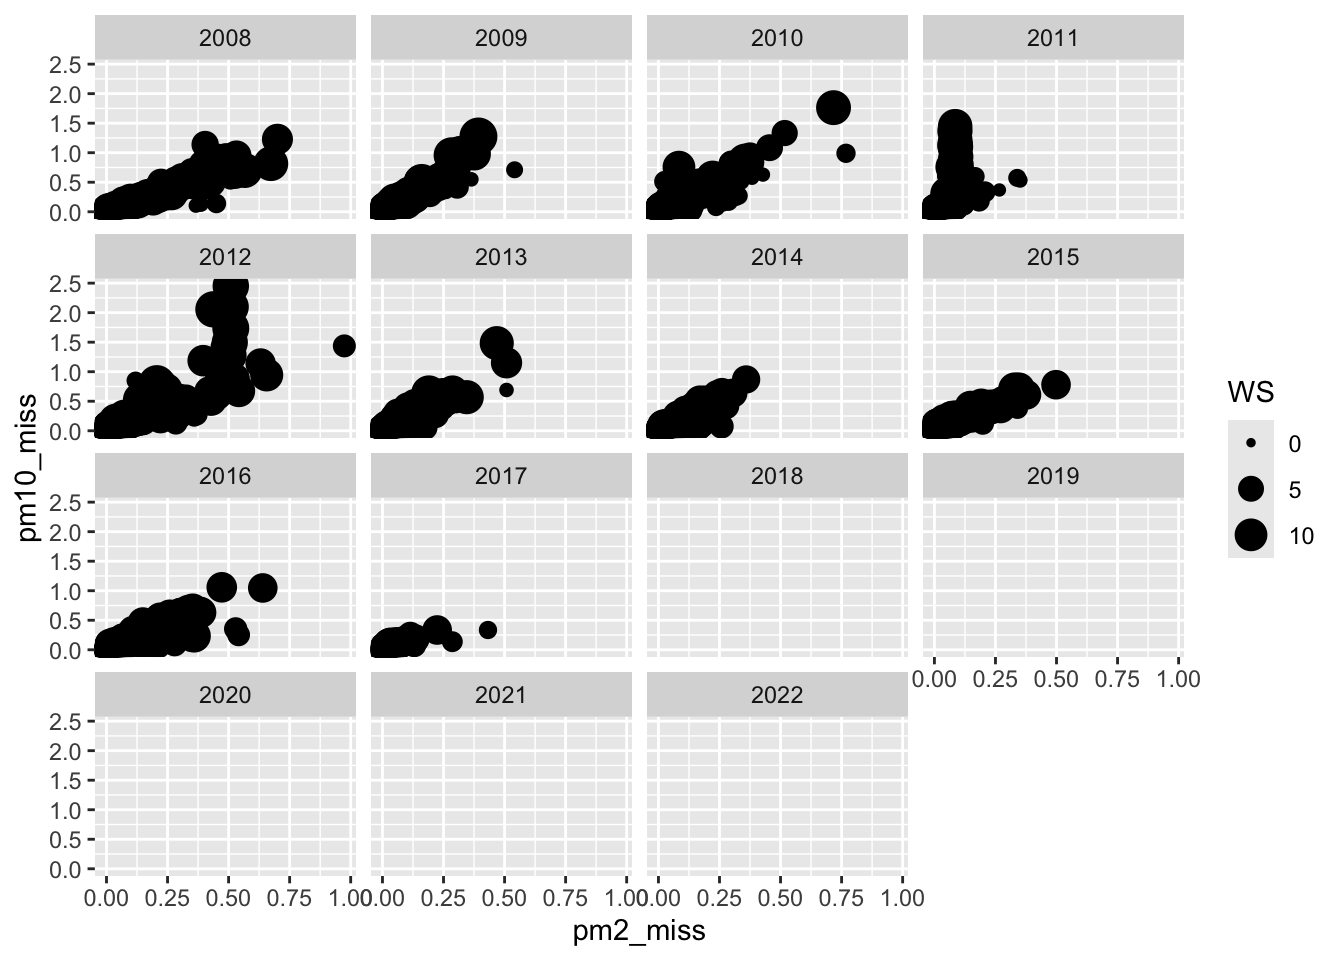

In [ ]:
  df2 |>
  filter(Station.name == "Zamynuud") |>
  mutate(pm2_miss = replace(pm2_swap, pm2_swap > pm10_swap*3.5 | pm2_swap == 0, NA),
         pm10_miss = replace(pm10_swap, Year > 2016 & pm10_swap > 0.5| Year > 2017, NA)) |>
  ggplot(aes(pm2_miss, pm10_miss, size = WS)) +
  geom_point() +
    facet_wrap(~Year)

In [ ]:
breaks_ratio <- c(min(df2$ratio_miss, na.rm = T), 0, 1, max(df2$ratio_miss, na.rm = T))

Warning in min(df2$ratio_miss, na.rm = T): no non-missing arguments to min;
returning Inf

Warning in max(df2$ratio_miss, na.rm = T): no non-missing arguments to max;
returning -Inf

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   -Inf    -Inf     0.5             Inf     Inf 

In [ ]:
df2_log <- df1 |>
  mutate(pm10_log = log(pm10_swap+0.0000000000000000001),
         pm2_log = log(pm2_swap + 0.00000001),
         WS_log = log1p(WS))

In [ ]:
df2_log <- df2_log |>
mutate(pm10_miss_log = replace(pm10_log, pm10_swap > 6 | pm10_swap < pm2_swap | pm10_swap == 0, NA), 
       pm2_miss_log = replace(pm2_log, pm2_swap > 6 | pm2_swap > pm10_swap |pm2_swap == 0 , NA))
write_csv(df2_log, file = "/Users/munkhtsetseg/WORK/Research/Data/02_data_tidy/clean_df2.csv")

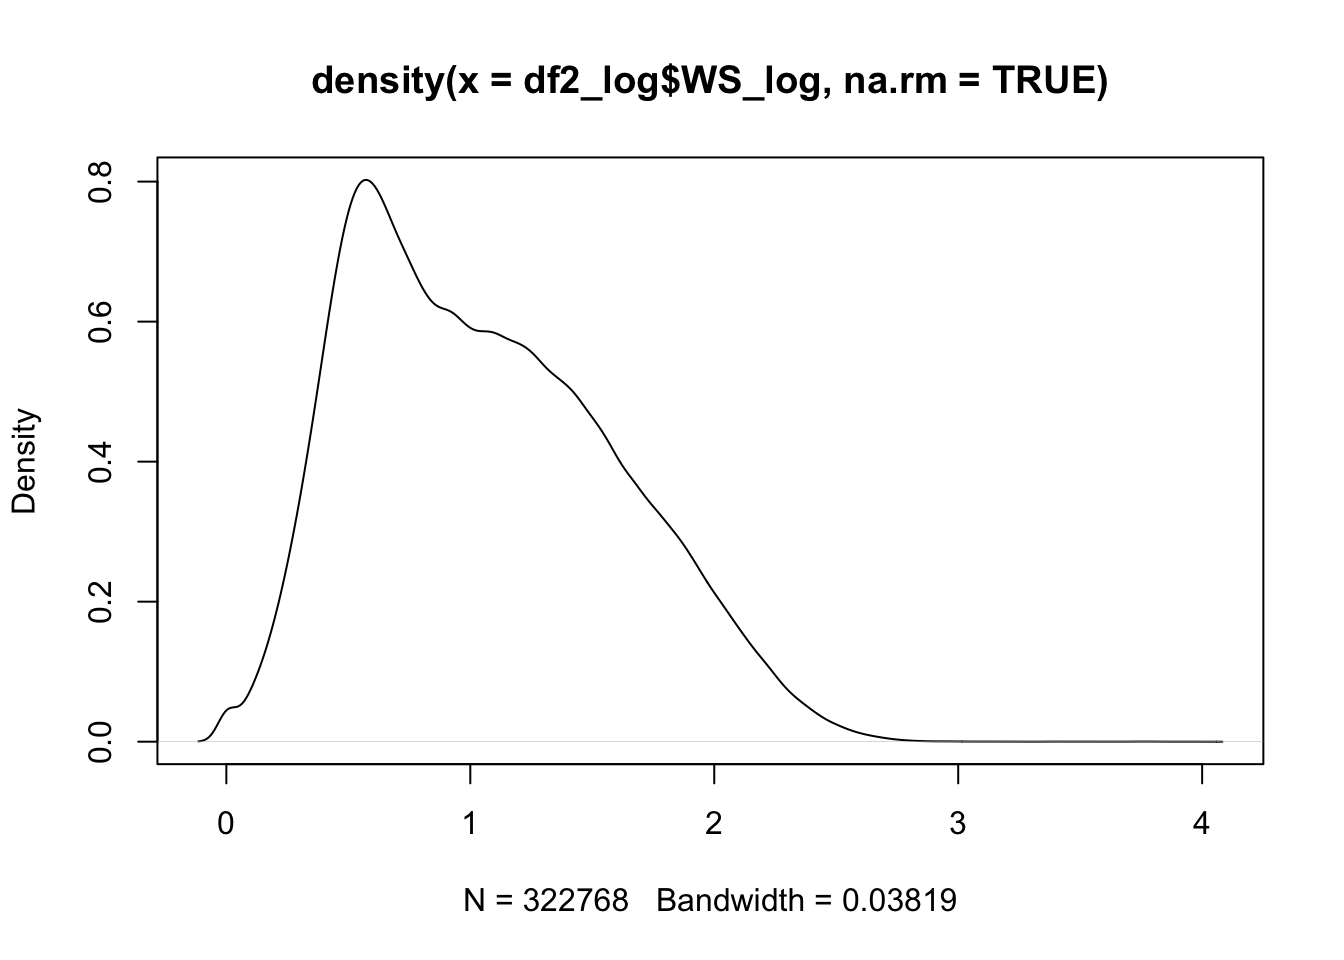

In [ ]:
plot(density(df2_log$WS_log, na.rm=TRUE)) 

In [ ]:
#write_csv(df2_01, file = "/Users/munkhtsetseg/WORK/Research/Data/02_data_tidy/clean_df2_01.csv")

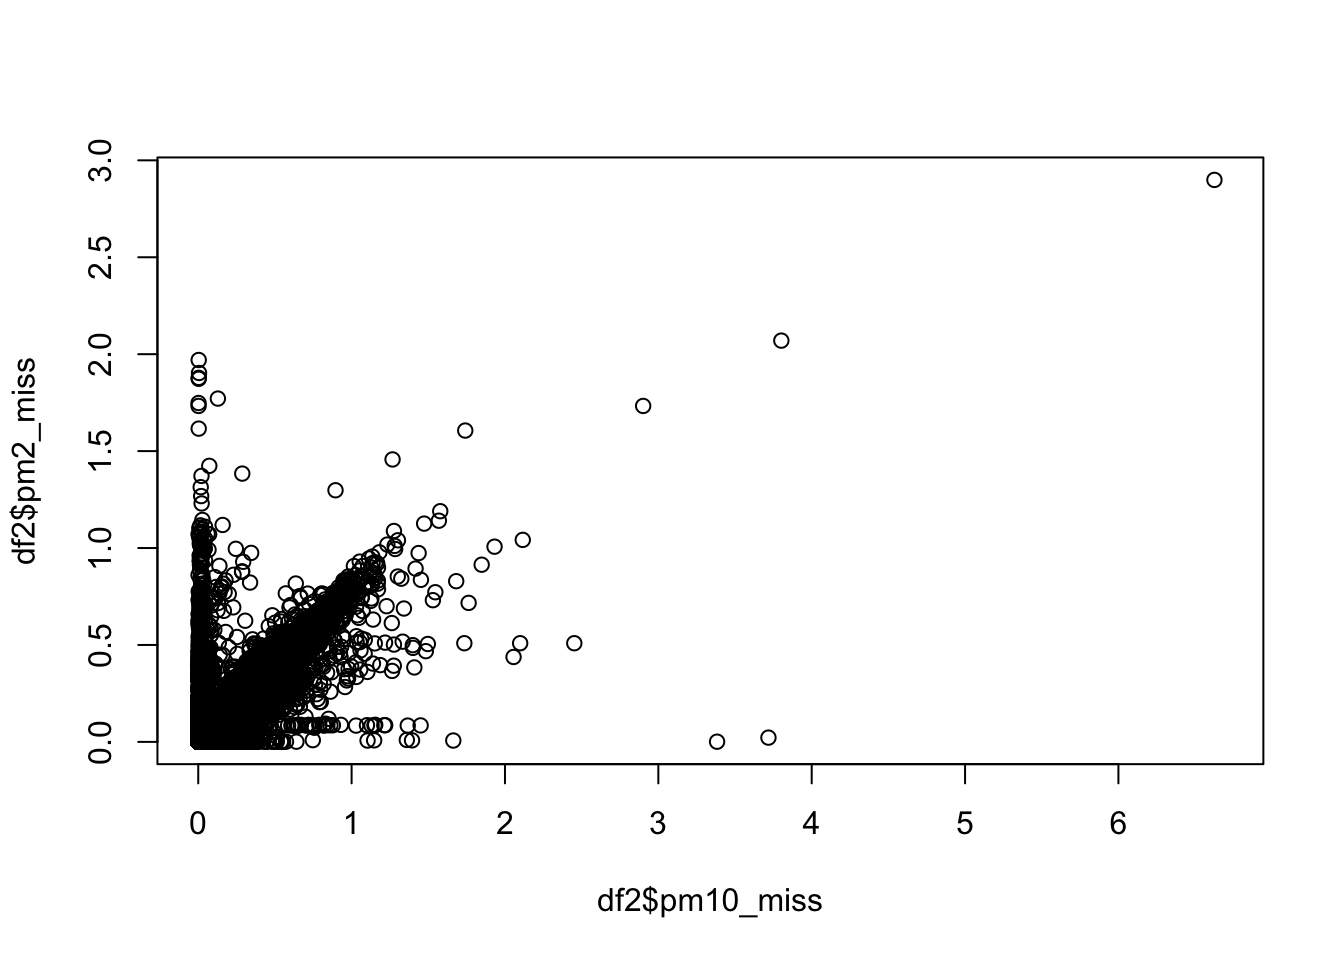

In [ ]:
plot(df2$pm10_miss, df2$pm2_miss)

In [ ]:
df0 <- df2 |>
  filter(pm2_miss == 0 | pm10_miss == 0)

#plot(df2$ratio_miss, df2$ratio_adj)

(`geom_point()`).

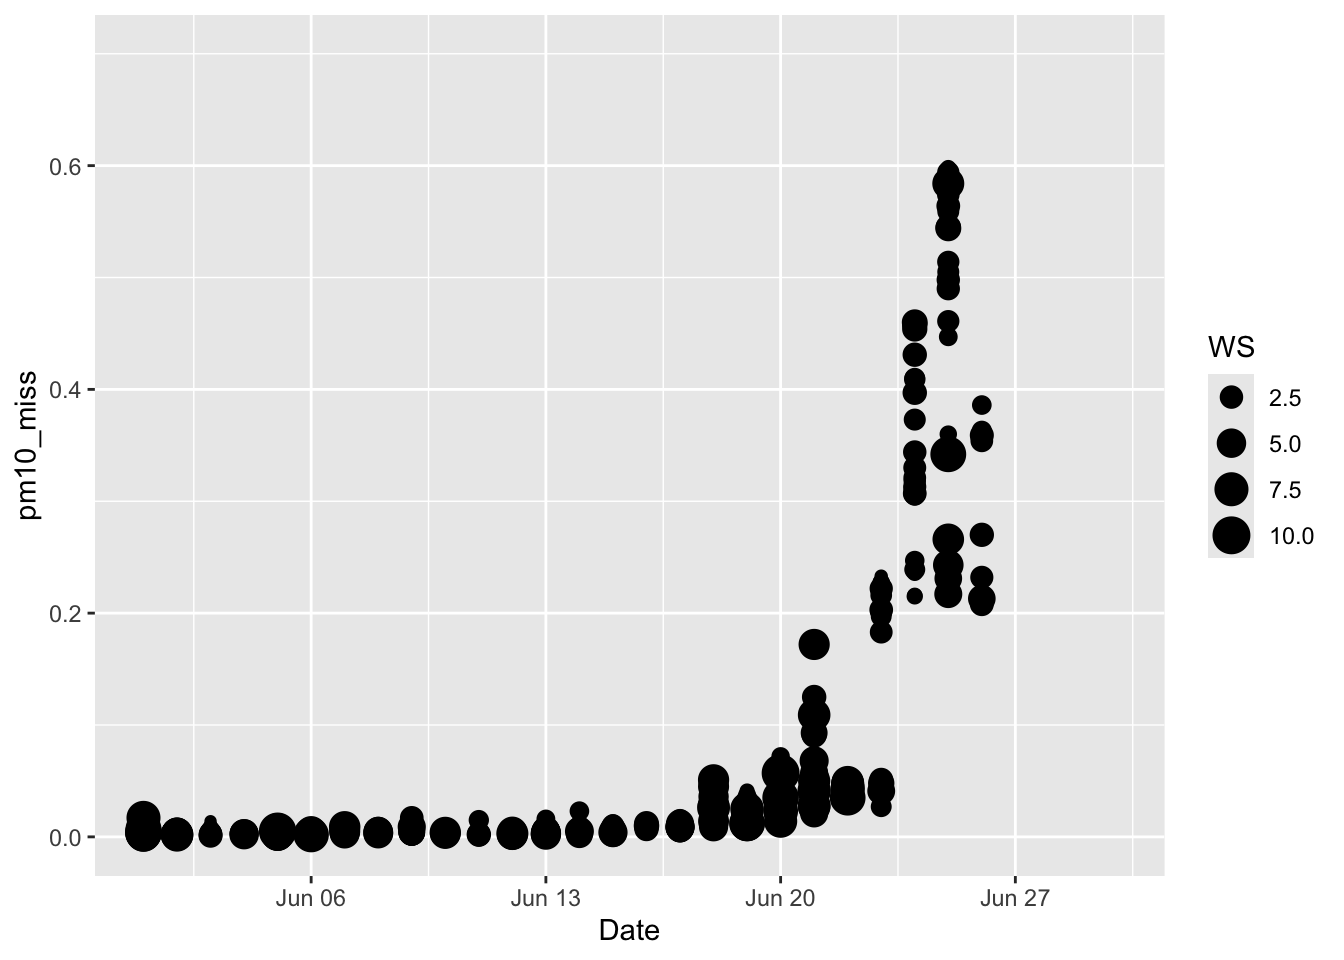

<ggproto object: Class FacetWrap, Facet, gg>
    compute_layout: function
    draw_back: function
    draw_front: function
    draw_labels: function
    draw_panels: function
    finish_data: function
    init_scales: function
    map_data: function
    params: list
    setup_data: function
    setup_params: function
    shrink: TRUE
    train_scales: function
    vars: function
    super:  <ggproto object: Class FacetWrap, Facet, gg>

In [ ]:
df2 |>
  filter( Station.name == "Sainshand" & Year==2011 & Month ==6) |>
  ggplot(aes(x= Date, y= pm10_miss, 
             size = WS)) + 
  geom_point() +
  ylim(0,0.7)

(`geom_point()`).

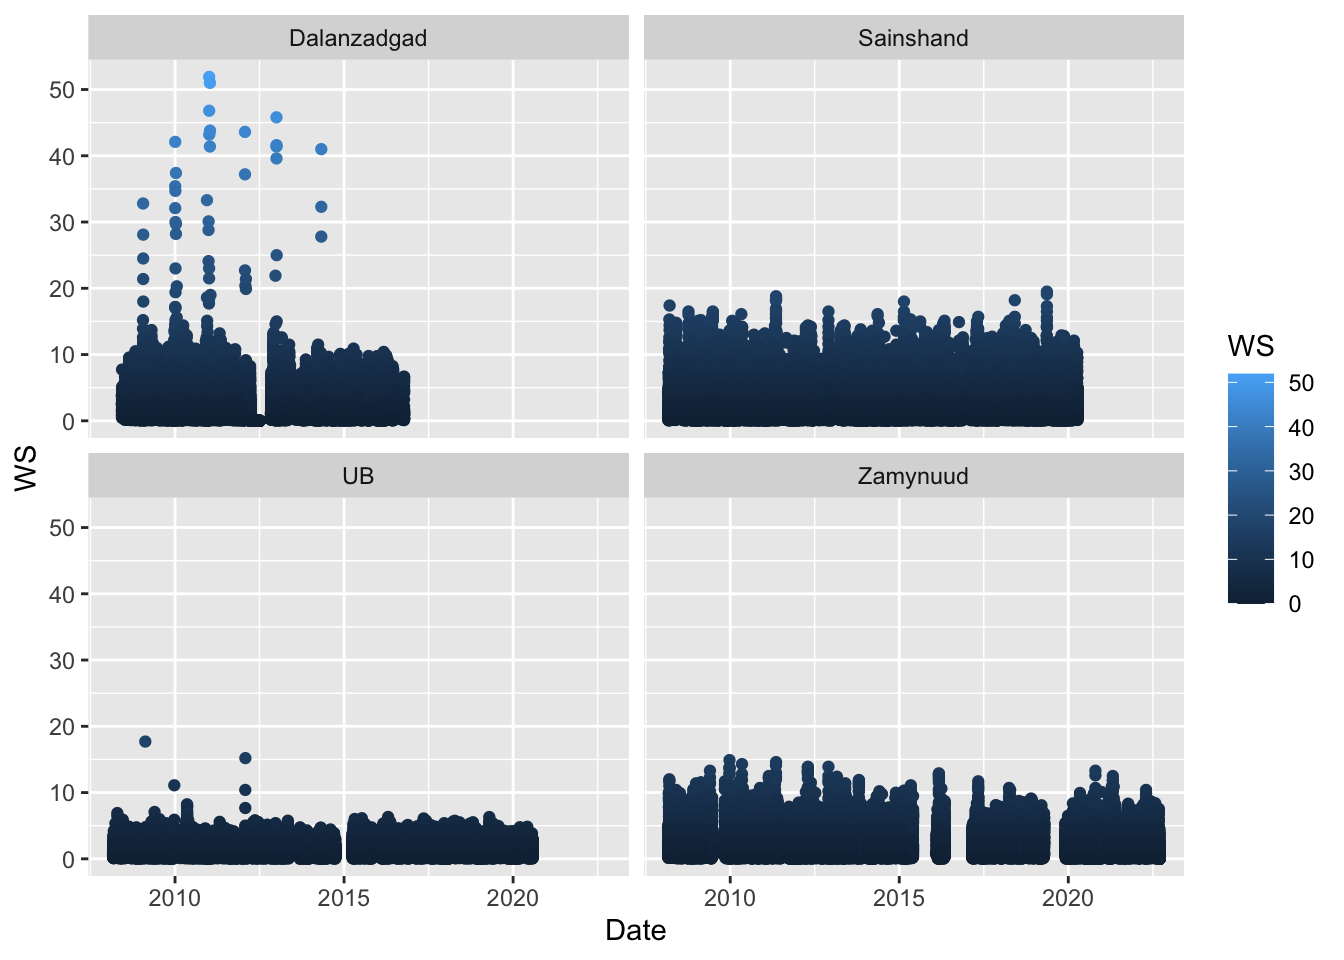

In [ ]:
ggplot(df2, aes(x= Date, y= WS, 
           color = WS)) + 
  geom_point() +
#ylim(0,10000) +
  facet_wrap(~Station.name)

In [ ]:
#ggplot(df0, aes(x= WS, y= ratio_miss, 
#                color = factor(Year))) + 
#  geom_point() +
# ylim(0,3) +
#  facet_wrap(~Station.name)

(`geom_point()`).

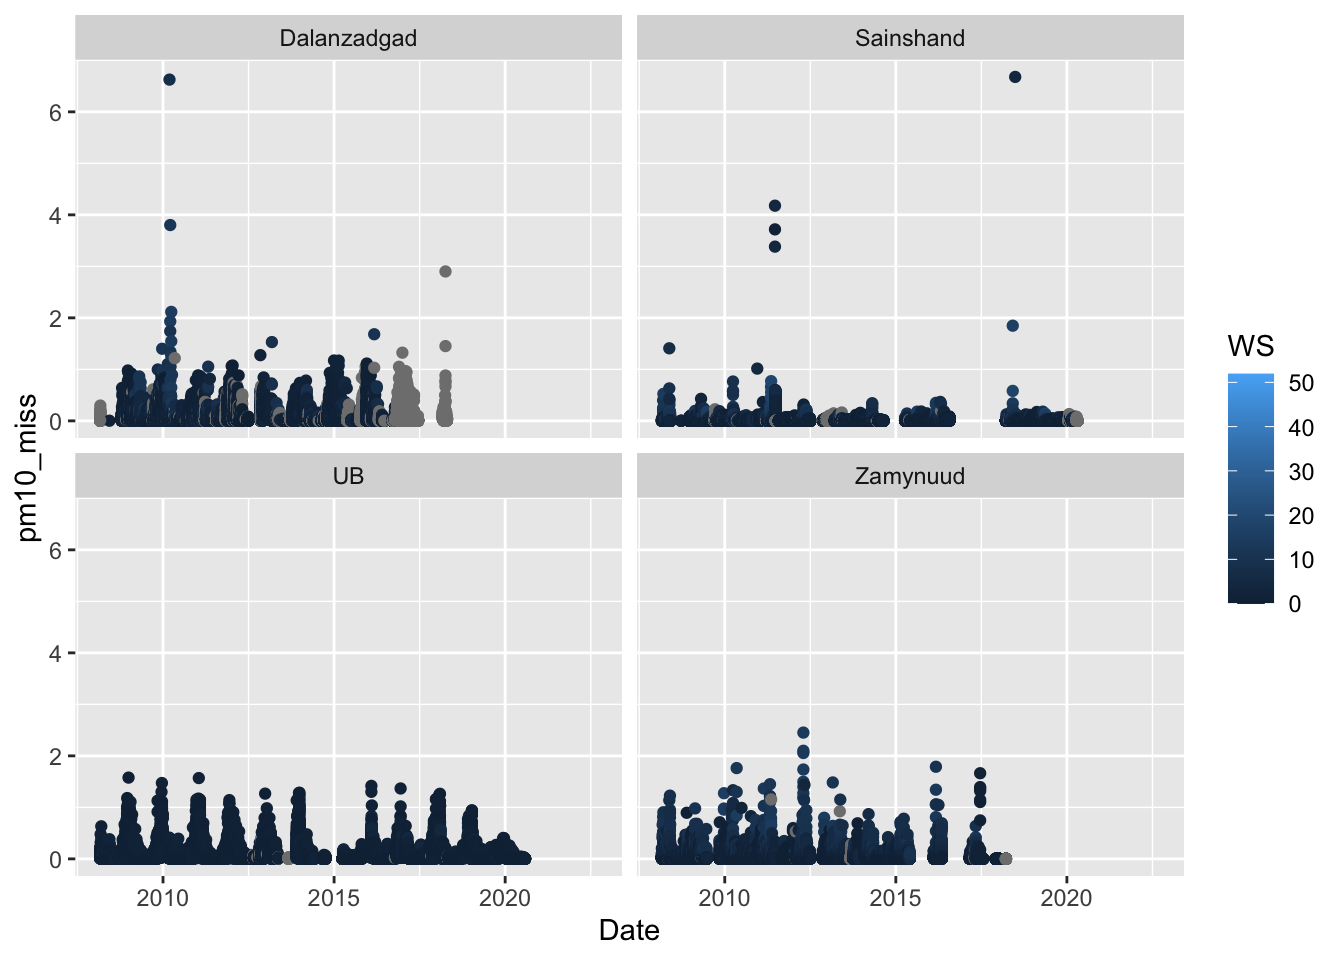

In [ ]:
ggplot(df2, aes(x= Date, y= pm10_miss, 
                color = WS)) + 
  geom_point() +
  facet_wrap(~Station.name)

In [ ]:
#plot(df1$pm2_adj, df1$pm10_adj)
#ggplot(df1, aes(pm2_adj, pm10_adj, color=Station.name, size=WS)) + 
#  geom_point()

In [ ]:
#ggplot(df1, aes(pm2_miss, pm10_miss, color=Station.name, size=WS)) + 
#  geom_point()

In [ ]:
df_dal <- df2 |>
  filter(Station.name == "Dalanzadgad" & Year == 2011) |>
  transform(pm10_adj = pmax(pm2_miss, pm10_miss), 
            pm2_adj = pmin(pm2_miss, pm10_miss)) |>
  mutate(ratio_adj = pm2_adj/pm10_adj)

In [ ]:
df_dal <- df2 |>
  transform(pm10_adj = pmax(pm2_miss, pm10_miss), 
            pm2_adj = pmin(pm2_miss, pm10_miss)) |>
  mutate(ratio_adj = pm2_adj/pm10_adj)

In [ ]:
d <- df_dal |>
  filter(pm10_adj != pm10_miss | pm2_adj != pm2_miss)

In [ ]:
#arrange(PM10) 

In [ ]:
#df1[1:87840, 6][df1[1:87840, 6] == 0] <- NA

In [ ]:
df1 <- df1 %>%
  distinct() |>
  arrange(PM2) 
df1[1:35460, 5][df1[1:35460, 5] == 0] <- NA